In [16]:
import numpy as np
import porespy as ps
import matplotlib.pyplot as plt
#from porespy.tools import extract_subsection

In [17]:
# set fn 
#fn = 'AW_DryScan_segm_650x650x294_8bitunsigned.raw'
fn = 'RandomSpherePackingMicrostructure.raw'

# set dims
#Dim_size=np.array((650,650,294))
Dim_size=np.array((525,565,1071))

# Open file
f = open(fn,'rb')

# setup out list
slices = []

# Loop through slices
for i in range(0,Dim_size[2]):
    img_arr=np.fromfile(f,dtype=np.uint8,count=Dim_size[0]*Dim_size[1])
    img=img_arr.reshape(Dim_size[0],Dim_size[1])
    #img=1-img
    subimg=ps.tools.extract_subsection(im=img, shape=[512, 512])
    subimg[subimg == 0] = 0
    subimg[subimg == 255] = 1
    slices.append(subimg)

In [18]:
stacked = np.dstack(slices)

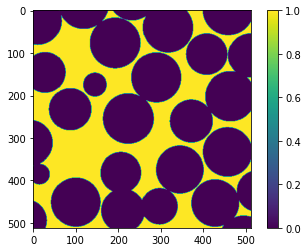

In [19]:
plt.imshow(stacked[:,:,10])
plt.colorbar()

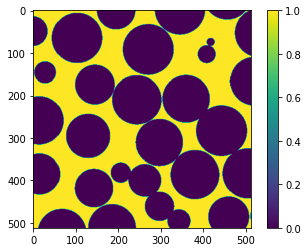

In [20]:
plt.imshow(stacked[:,:,100])
plt.colorbar()

In [21]:
stacked.dtype


dtype('uint8')

In [22]:
final_image = stacked[0:512,0:512,0:512]
final_image.shape

(512, 512, 512)

In [23]:
np.save('subBeadPackPy.npy', final_image)

In [17]:
ps.io.to_palabos(final_image, 'beadPack_palabos.dat',solid=0)